In [24]:
import pandas as pd
import numpy as np  
import seaborn as sns   
import matplotlib.pyplot as plt   
import plotly.graph_objs as go  

In [25]:
df = pd.read_csv('dataset.csv')
df = df.drop_duplicates()
print('Dataset shape:', df.shape)

df.head()

Dataset shape: (30000, 7)


,text,Anger,Fear,Happiness,Hatred,Sadness,Wonder
0,کرونا رو شکست میدهیم؟\nمرحله بعد چه گوهی میخوا...,4,3,1,3,3,4
1,اگر در چند ماه اخیر تصمیم داشته اید وارد بورس ...,2,4,1,2,4,2
2,یکی از پدرسوختگی های #برانداز اینه که ظاهرا ژس...,5,3,2,4,5,2
3,یکی از دوستای دبستانم,1,0,0,1,0,0
4,@username اینقدر گرفتار مسایل میشی که تخصص از ...,2,1,0,1,0,4


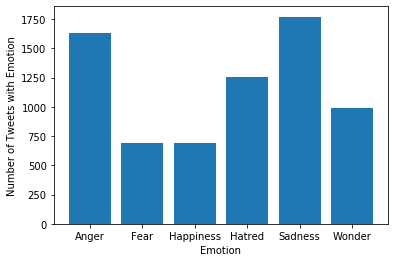

In [26]:
emotion_labels = ['Anger', 'Fear', 'Happiness', 'Hatred', 'Sadness','Wonder']
yes_label_counts = [0 for e in emotion_labels]

for _, row in df.iterrows():
    for e_id in range(len(emotion_labels)):
        e = emotion_labels[e_id]
        if row[e]>2:
            yes_label_counts[e_id] += 1

plt.bar(emotion_labels, yes_label_counts)
plt.xlabel('Emotion')
plt.ylabel('Number of Tweets with Emotion')
plt.show()

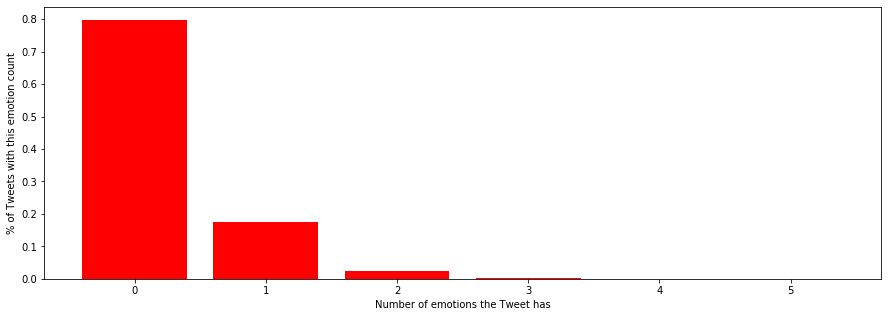

In [28]:
tweets_with_emotion_count = {}
sum_of_all_tweets = 0
for _, row in df.iterrows():
    number_of_emotions_tweet_has = 0
    for e_id in range(len(emotion_labels)):
        e = emotion_labels[e_id]
        if row[e]>2:
            number_of_emotions_tweet_has += 1
    if not number_of_emotions_tweet_has in tweets_with_emotion_count.keys():
        tweets_with_emotion_count[number_of_emotions_tweet_has] = 0
    tweets_with_emotion_count[number_of_emotions_tweet_has] += 1
    sum_of_all_tweets+= 1

x_val, y_val = [k for k in tweets_with_emotion_count.keys()], [tweets_with_emotion_count[k]/sum_of_all_tweets for k in tweets_with_emotion_count.keys()]

plt.figure(figsize=(15, 5))
plt.bar(x_val, y_val, color='red')
plt.xlabel('Number of emotions the Tweet has')
plt.ylabel('% of Tweets with this emotion count')
plt.show()

In [31]:
emotion_cooccurance = {k1: {k2: 0 for k2 in emotion_labels} for k1 in emotion_labels}
emotion_occurance = {k:0 for k in emotion_labels}

for _, row in df.iterrows():
    for e1 in emotion_labels:
        for e2 in emotion_labels:
            if e1 == e2:
                continue 
            if row[e1]>2 and row[e2]>2:
                emotion_cooccurance[e1][e2] += 1
                
        if row[e1]>2:
            emotion_occurance[e1] += 1

In [32]:
emotion_occurance

{'Anger': 1632,
 'Fear': 690,
 'Happiness': 692,
 'Hatred': 1256,
 'Sadness': 1770,
 'Wonder': 986}

In [33]:
emotion_cooccurance

{'Anger': {'Anger': 0,
  'Fear': 63,
  'Happiness': 34,
  'Hatred': 142,
  'Sadness': 198,
  'Wonder': 88},
 'Fear': {'Anger': 63,
  'Fear': 0,
  'Happiness': 20,
  'Hatred': 44,
  'Sadness': 74,
  'Wonder': 29},
 'Happiness': {'Anger': 34,
  'Fear': 20,
  'Happiness': 0,
  'Hatred': 27,
  'Sadness': 29,
  'Wonder': 25},
 'Hatred': {'Anger': 142,
  'Fear': 44,
  'Happiness': 27,
  'Hatred': 0,
  'Sadness': 152,
  'Wonder': 69},
 'Sadness': {'Anger': 198,
  'Fear': 74,
  'Happiness': 29,
  'Hatred': 152,
  'Sadness': 0,
  'Wonder': 105},
 'Wonder': {'Anger': 88,
  'Fear': 29,
  'Happiness': 25,
  'Hatred': 69,
  'Sadness': 105,
  'Wonder': 0}}

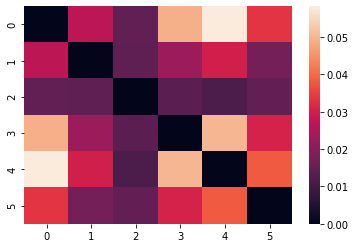

In [34]:
li = []
all_the_labels = []
for k1 in emotion_cooccurance.keys():
    all_the_labels.append(k1)

for k1 in all_the_labels:
    this_row = []
    for k2 in all_the_labels:
        this_row.append(emotion_cooccurance[k1][k2]/(emotion_occurance[k1]+emotion_occurance[k2]))
    li.append(this_row)

sample_data = np.array(li)  
ax = sns.heatmap(sample_data) 

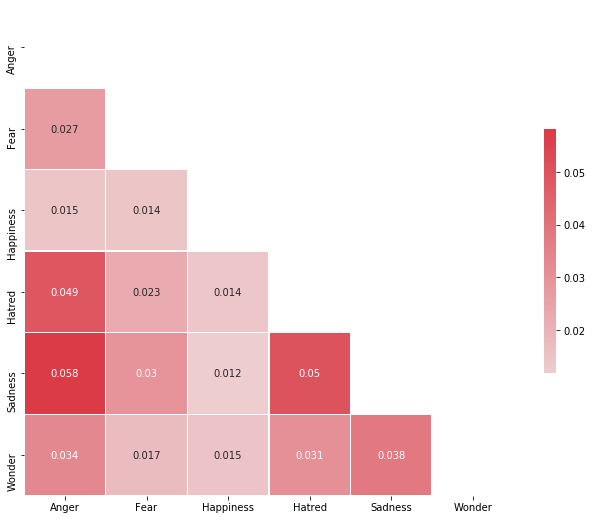

In [35]:
mask = np.triu(np.ones_like(sample_data, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(int(120), int(10), as_cmap=True)
sns.heatmap(sample_data, mask=mask, center=0, annot=True, cmap = cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=all_the_labels,
        yticklabels=all_the_labels)